In [1]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Question:
    Is there a certain genre that has the highest sales?

## 1- Expectations:   
    - It's expected that in video games, There is a genre that is much preferred by the users than
      others and has the highest sales.

## 2- Data Collection: 
    

## Read data 

In [12]:
df = read_data(kind='dataset')
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


## Handle Missing Values
    - Dropping rows with missing values is not the best approach here, as shown in the Data Exploration section.
    - We will perform mode imputation for categorical features and KNN imputation for numerical features, since we
      are interested in exploring   the sales' features.

In [3]:
df= handle_missing_values(df, handling_method='mode_knn', neighbors=5)

Total Number of rows : 16719
Number of rows with missing values: 9894
Number of rows after handling missing values: 16719 and Number of missing values: 0


## Handle outliers
    - Number of outliers in ['NA_Sales','EU_Sales','JP_Sales'] is very huge, so it's not the best action to remove all of them.
    - Instead we can remove the rows having more than 1 outlier in these 3 columns.

In [4]:
df= remove_common_outliers(df,['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'],)
print('Number of original rows: ', df.shape[0])

Number of outliers removed: 4760
Number of original rows:  11959


- This is safer than removing 10317 rows (As shown in Data Exploration section)

## EDA

### Genre Distribution

In [5]:
genres=df['Genre'].value_counts()
genres

Action          2467
Sports          1602
Misc            1341
Adventure       1136
Racing           925
Shooter          899
Role-Playing     862
Simulation       654
Platform         584
Fighting         535
Strategy         502
Puzzle           452
Name: Genre, dtype: int64

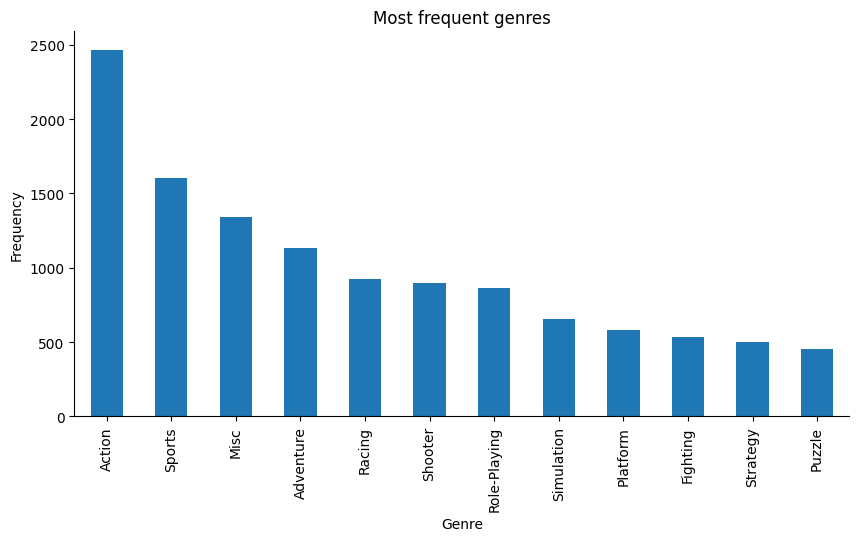

In [6]:
genres.plot(kind='bar', figsize=(10,5))

sns.despine(left=False, bottom=False)
plt.title('Most frequent genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

### Average Sales for each genre

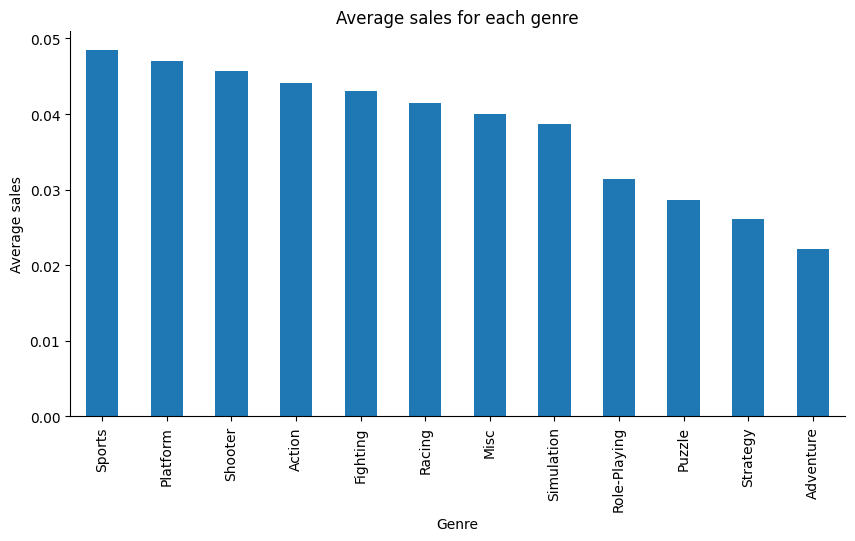

In [7]:
df_genre = df.groupby('Genre').mean(numeric_only=True)
df_genre['Total_Sales'] = df_genre[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean(axis=1)
df_genre = df_genre.sort_values(by='Total_Sales', ascending=False)
df_genre['Total_Sales'].plot(kind='bar', figsize=(10,5))

sns.despine(left=False, bottom=False)
plt.grid(False)
plt.title('Average sales for each genre')
plt.xlabel('Genre')
plt.ylabel('Average sales')
plt.show()

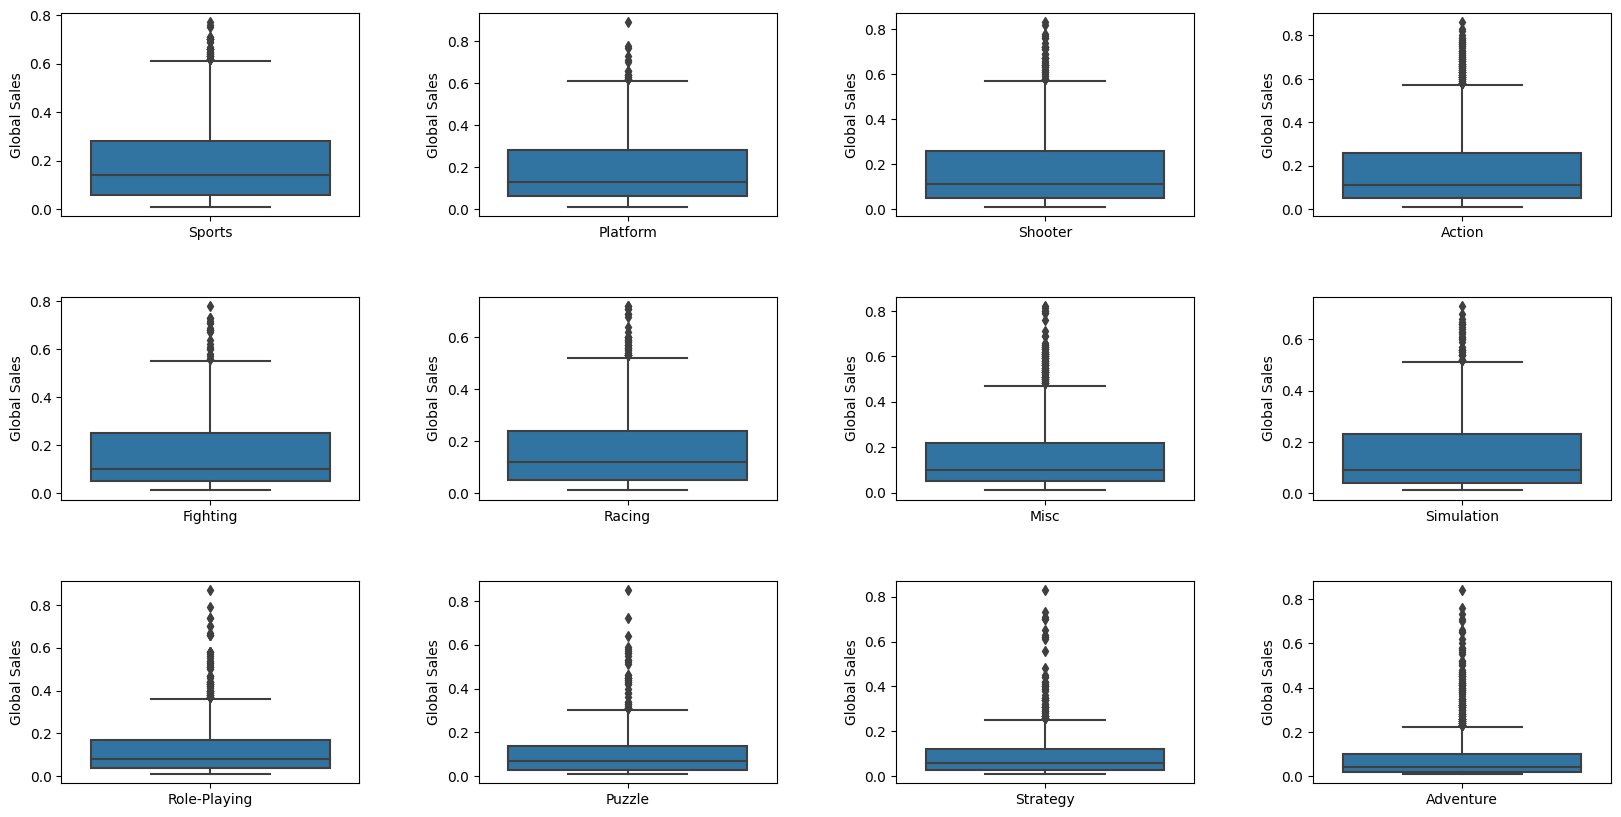

In [9]:
genres_summary=df.groupby('Genre')['Global_Sales'].describe().sort_values(by='mean', ascending=False)
genres_summary

# draw a boxplot to show distributions with respect to categories.
fig, axes = plt.subplots(3, 4, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, (idx, row) in enumerate(genres_summary.iterrows()):
    ax = axes[int(i/4), i%4]
    sns.boxplot(x='Genre', y='Global_Sales', data=df[df['Genre']==idx], ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('Global Sales')
    ax.grid(False)

## 3- Comparing Expectations to data:
    - Sports genre has the highest sales as shown in the plots, so the expectations match the data.
        